In [1]:
#%matplotlib ipympl  # enable this for realtime graphs

# first compile the c modules where the model depends on
from explain_core.ModulesCompiler import compile_modules;

# compile the c++ modules if necessary
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# configure spontaneous breathing
neo.model.models["Breathing"].breathing_enabled = True

# configure the ventilator
neo.model.models["Ventilator"].vent_mode = "PRVC"
neo.model.models["Ventilator"].pip_cmh2o_max = 20.0
neo.model.models["Ventilator"].peep_cmh2o = 3.0
neo.model.models["Ventilator"].tidal_volume = 0.015
neo.model.models["Ventilator"].vent_rate = 35.0
neo.model.models["Ventilator"].insp_flow = 8.0
neo.model.models["Ventilator"].synchronized = False
neo.model.models["Ventilator"].switch_ventilator(False)

# configure ecls
neo.model.models["Ecls"].set_fio2(0.30)
neo.model.models["Ecls"].set_co2_flow(40.0)
neo.model.models["Ecls"].set_rpm(2500.0)
neo.model.models["Ecls"].switch_ecls(False)

# open the shunts
# neo.model.models["DA"].enable()
# neo.model.models["DA"].set_length(10.0)
# neo.model.models["DA"].set_diameter(2.0)

# neo.model.models["FO"].enable()
# neo.model.models["FO"].set_length(1.0)
# neo.model.models["FO"].set_diameter(2.0)


# # increase the pulmonary vascular resistance
# # neo.model.models["PA"].el_base_factor = 10.0
# # neo.model.models["PA_LL"].r_for_factor = 1000.0
# # neo.model.models["PA_RL"].r_for_factor = 1000.0

# # configure placental circulation
# neo.model.models["Placenta"].switch_placenta(False)

# # neo.model.models["Metabolism"].vo2 = 5.0
# # stabilize by calculating 60 seconds

neo.fastforward(60)

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 2.8 sec. Average model step in 0.0231 ms.


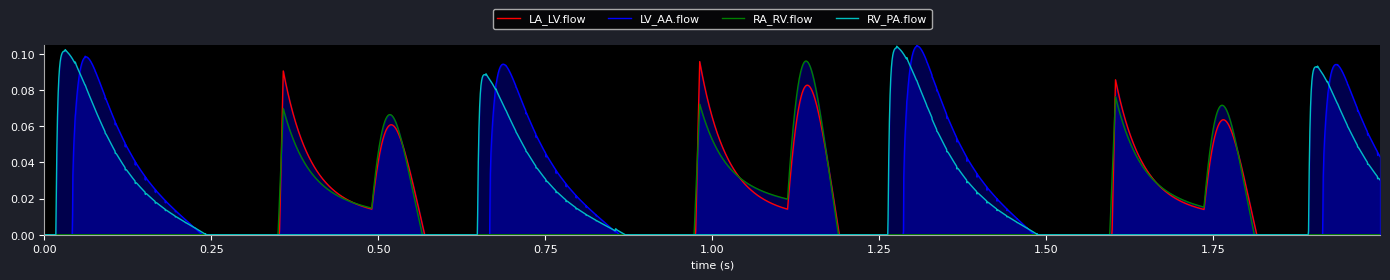

In [4]:
neo.plot_heart_flows()

In [5]:
neo.get_vitals()


AA.pres         : max    77.9334, min   43.18958 mmHg
PA.pres         : max   46.98606, min   18.27509 mmHg
IVCI.pres       : max    2.77336, min    1.49125 mmHg


{'heartrate': 96.40086919354223,
 'spo2_pre': 97.73290090080317,
 'spo2_post': 97.3891802017215,
 'abp_systole': 77.9334,
 'abp_diastole': 43.18958,
 'pap_systole': 46.98606,
 'pap_diastole': 18.27509,
 'cvp': 1.918577263,
 'resp_rate': 37.88251005616044,
 'pH': 7.404385520635398,
 'po2': 96.14930904972597,
 'pco2': 41.970087798750455,
 'hco3': 25.944133744322833,
 'be': 0.7822141996518832}